# Recommendation System



## Task
To implement a recommendation system using cosine similarity based on anime genres and/or ratings.

## EDA:

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Jananisri\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:61: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
!pip install --upgrade bottleneck

  Obtaining dependency information for bottleneck from https://files.pythonhosted.org/packages/17/03/f89a2eff4f919a7c98433df3be6fd9787c72966a36be289ec180f505b2d5/bottleneck-1.5.0-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/112.1 kB ? eta -:--:--
   ----------------------------- ---------- 81.9/112.1 kB 1.5 MB/s eta 0:00:01
   ---------------------------------------- 112.1/112.1 kB 1.6 MB/s eta 0:00:00
  Attempting uninstall: bottleneck
    Found existing installation: Bottleneck 1.3.5
    Uninstalling Bottleneck-1.3.5:
      Successfully uninstalled Bottleneck-1.3.5


In [4]:
df = pd.read_csv('./anime.csv')

In [5]:
df1 = df.copy()

In [6]:
df1.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [7]:
df1.shape

(12294, 7)

### Data Preprocessing

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


### Checking for  Missing Values

In [10]:
df1.isnull().sum()

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

#### -> drop all the missing values

In [11]:
df2 = df1.dropna()

In [12]:
df2.isnull().sum()

anime_id    0
name        0
genre       0
type        0
episodes    0
rating      0
members     0
dtype: int64

#### -> No more missing values in data set


In [15]:
df1.shape

(12294, 7)

In [16]:
df2.shape

(12017, 7)

#### -> 277 rows were deleted because of missing values

### Checking for Duplicate values

In [17]:
df2.duplicated().sum()

0

#### -> No Duplicate values found.

In [18]:
df2.columns

Index(['anime_id', 'name', 'genre', 'type', 'episodes', 'rating', 'members'], dtype='object')

In [19]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12017 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12017 non-null  int64  
 1   name      12017 non-null  object 
 2   genre     12017 non-null  object 
 3   type      12017 non-null  object 
 4   episodes  12017 non-null  object 
 5   rating    12017 non-null  float64
 6   members   12017 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 751.1+ KB


In [20]:
df2 = df2.reset_index(drop=True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12017 entries, 0 to 12016
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12017 non-null  int64  
 1   name      12017 non-null  object 
 2   genre     12017 non-null  object 
 3   type      12017 non-null  object 
 4   episodes  12017 non-null  object 
 5   rating    12017 non-null  float64
 6   members   12017 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 657.3+ KB


### Summary statistics (numerical columns):

In [21]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
anime_id,12017.0,13638.001165,11231.076675,1.00,3391.00,9959.00,23729.00,34519.0
rating,12017.0,6.478264,1.023857,1.67,5.89,6.57,7.18,10.0
members,12017.0,18348.879005,55372.496436,12.00,225.00,1552.00,9588.00,1013917.0


### Unique values:

In [22]:
df2.nunique()

anime_id    12017
name        12015
genre        3229
type            6
episodes      187
rating        598
members      6596
dtype: int64

### Distribution of categorical variables:

In [25]:
# Distribution of different anime broadcast types
df2['type'].value_counts()

type
TV         3668
OVA        3284
Movie      2259
Special    1670
ONA         648
Music       488
Name: count, dtype: int64

In [26]:
df2['genre'].value_counts()

genre
Hentai                                                   816
Comedy                                                   521
Music                                                    297
Kids                                                     197
Comedy, Slice of Life                                    174
                                                        ... 
Adventure, Comedy, Horror, Shounen, Supernatural           1
Comedy, Harem, Romance, School, Seinen, Slice of Life      1
Comedy, Ecchi, Sci-Fi, Shounen                             1
Adventure, Shounen, Sports                                 1
Hentai, Slice of Life                                      1
Name: count, Length: 3229, dtype: int64

### individual genre frequency - genres are comma-separated

In [28]:
# Split the genres and count occurrences of each genre
from collections import Counter

# Combine all genres into a single list
genre_series = df2['genre'].str.split(', ')
all_genres = genre_series.sum()

# Count occurrences
genre_counts = Counter(all_genres)

# Convert to DataFrame and view
genre_df = pd.DataFrame.from_dict(genre_counts, orient='index', columns=['Count']).sort_values(by='Count', ascending=False)
genre_df.head(10)

,Count
Comedy,4575
Action,2768
Adventure,2316
Fantasy,2242
Sci-Fi,2036
Drama,1977
Shounen,1684
Kids,1598
Romance,1437
Slice of Life,1204


## Visualization of the distributions

### Bar plot - Distribution of Anime Broadcast Types

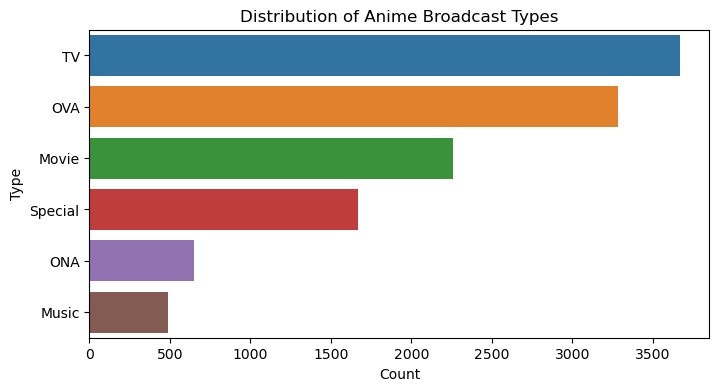

In [29]:

plt.figure(figsize=(8, 4))
sns.countplot(y='type', data=df2, order=df['type'].value_counts().index)
plt.title('Distribution of Anime Broadcast Types')
plt.xlabel('Count')
plt.ylabel('Type')
plt.show()

### Barplot - Top 10 Most Common Anime Genres

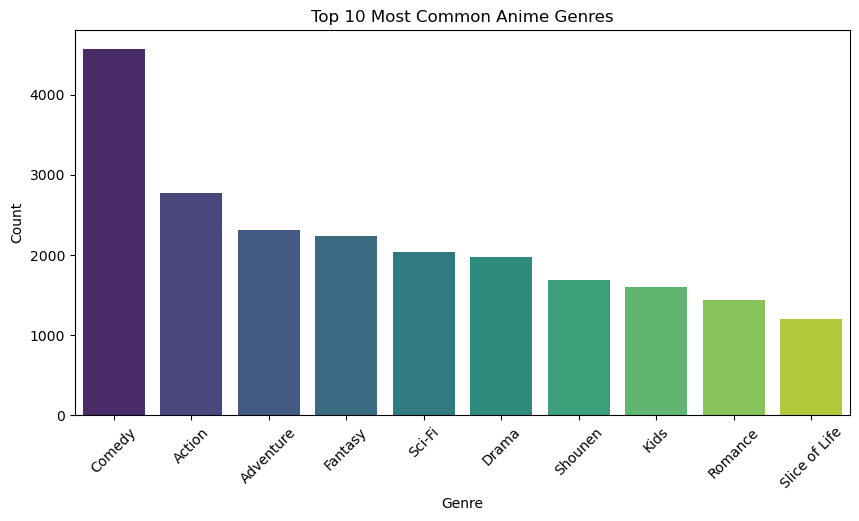

In [42]:
plt.figure(figsize=(10, 5))
sns.barplot(x=genre_df.head(10).index, y=genre_df.head(10)['Count'], palette='viridis')
plt.xticks(rotation=45)
plt.title('Top 10 Most Common Anime Genres')
plt.ylabel('Count')
plt.xlabel('Genre')
plt.show()

#### Plot interpretation: 

The bar plot of genre distribution displays the frequency of the top 10 genres in the dataset.The most prevalent genres among the anime is comedy,action, adventure, fantasy .


### Top 10 Most Popular Anime 

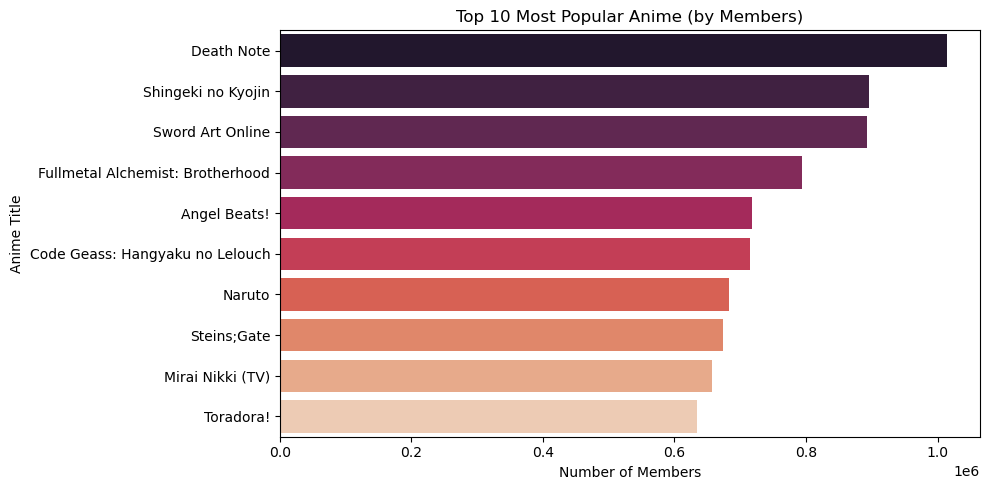

In [51]:
# Get top 10 anime by 'members'
top_anime = df2[['name', 'members']].sort_values(by='members', ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x='members', y='name', data=top_anime, palette='rocket')
plt.title('Top 10 Most Popular Anime (by Members)')
plt.xlabel('Number of Members')
plt.ylabel('Anime Title')
plt.tight_layout()
plt.show()

### Histogram - Rating Distribution

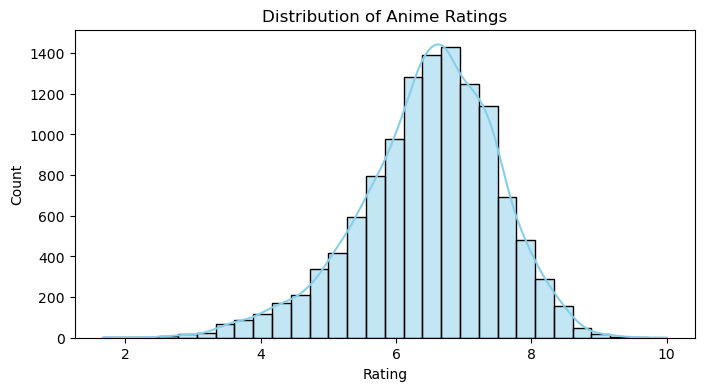

In [33]:
plt.figure(figsize=(8, 4))
sns.histplot(df2['rating'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Anime Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

### Plot interpretation:

The histogram of ratings shows the distribution of ratings given to the anime.

Most ratings are concentrated within a certain range.
The distribution might be skewed, indicating that some anime are more popular or better received than others.




## Feature extraction

The features required for computing similarity between anime by converting categorical genre information into numerical representations and standardizing numerical features using standard scaling.

### Encoding categorical feature "genre" - using One-hot encoder

In [34]:
genres = df2['genre'].str.get_dummies(sep=', ')
df_numerical = pd.concat([df2.drop('genre', axis=1), genres], axis=1)

### Scaling the data - with StandardScaler

In [35]:
from sklearn.preprocessing import StandardScaler

In [36]:
scaler = StandardScaler()

In [37]:
numerical_cols = ['rating', 'members']

In [38]:
df_numerical[numerical_cols] = scaler.fit_transform(df_numerical[numerical_cols])

In [39]:
df_numerical.head()

,anime_id,name,type,episodes,rating,members,Action,Adventure,Cars,Comedy,...,Shounen Ai,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Vampire,Yaoi,Yuri
0,32281,Kimi no Na wa.,Movie,1,2.824474,3.292044,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,5114,Fullmetal Alchemist: Brotherhood,TV,64,2.717032,14.002410,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,28977,Gintama°,TV,51,2.707265,1.732216,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,9253,Steins;Gate,TV,24,2.629126,11.833499,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,9969,Gintama&#039;,TV,51,2.619358,2.400518,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0


### Distribution of Scaled Ratings and Members 

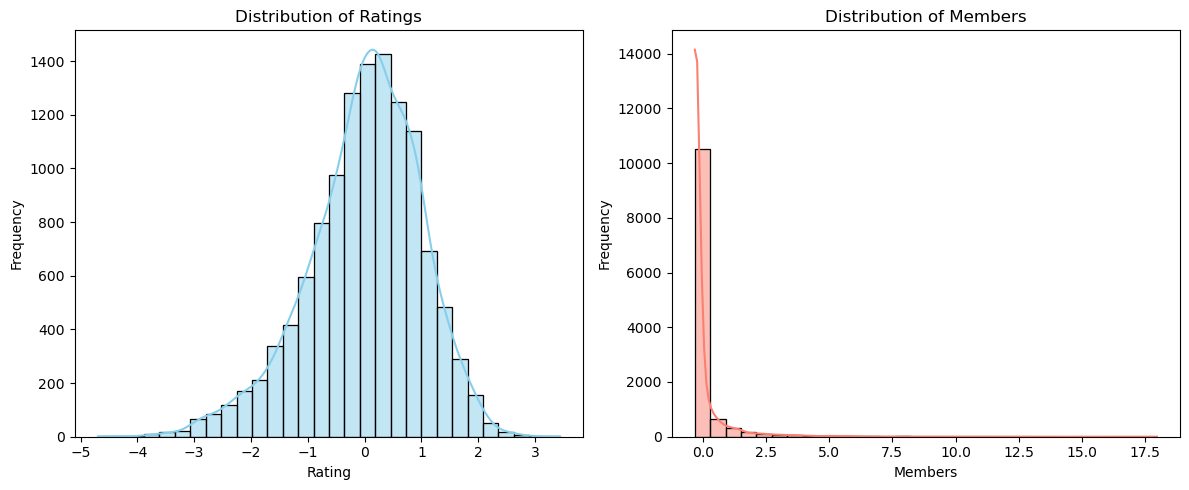

In [46]:
plt.figure(figsize=(12, 5))

# Distribution of Ratings
plt.subplot(1, 2, 1)
sns.histplot(df_numerical['rating'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')

# Distribution of Members
plt.subplot(1, 2, 2)
sns.histplot(df_numerical['members'], bins=30, kde=True, color='salmon')
plt.title('Distribution of Members')
plt.xlabel('Members')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


### Combined Overlay Plot for Ratings & Members

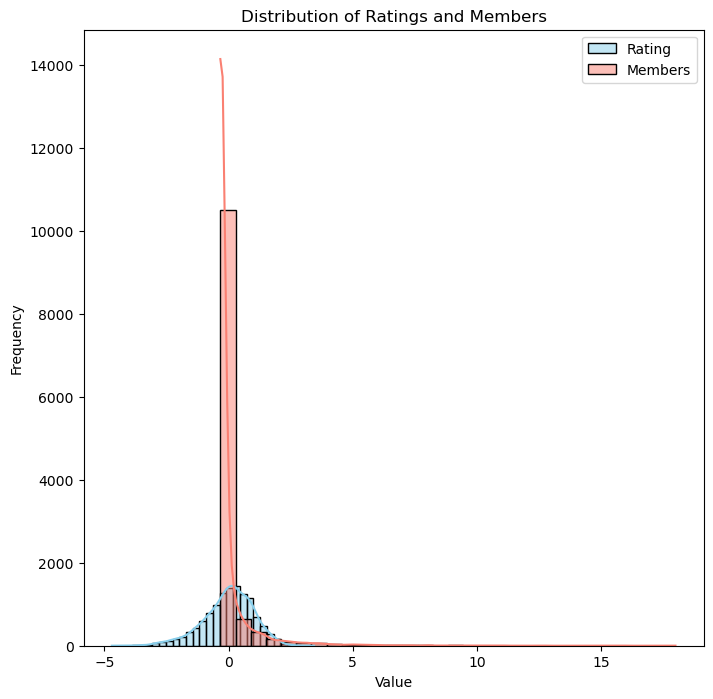

In [47]:
plt.figure(figsize=(8, 8))
sns.histplot(df_numerical['rating'], bins=30, color='skyblue', label='Rating', kde=True)
sns.histplot(df_numerical['members'], bins=30, color='salmon', label='Members', kde=True)
plt.title('Distribution of Ratings and Members')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()

## Recommendation system

#### Designing a function to recommend anime based on cosine similarity.

NOTE: Cosine similarity measures how similar two anime are based on their feature vectors (like genres, rating, members count, etc.)

In [48]:
from sklearn.metrics.pairwise import cosine_similarity

In [49]:
def recommend_similar_anime(target_anime, threshold=0.5):
    # Find the row corresponding to the target anime
    target_row = df_numerical[df_numerical['name'] == target_anime].drop(['name', 'type'], axis=1)

    # Replace 'Unknown' values in 'episodes' column with NaN
    df_numerical['episodes'] = pd.to_numeric(df_numerical['episodes'], errors='coerce')

    # Drop rows with NaN values in 'episodes' column
    df_numerical.dropna(subset=['episodes'], inplace=True)

    # Compute cosine similarity between target anime and all other anime
    similarities = cosine_similarity(target_row, df_numerical.drop(['name', 'type'], axis=1))

    # Get indices of anime with similarity above threshold
    similar_anime_indices = np.where(similarities > threshold)[1]

    # Exclude the target anime itself from recommendations
    similar_anime_indices = similar_anime_indices[similar_anime_indices != target_row.index[0]]

    # Get names of recommended anime
    recommended_anime = df_numerical.iloc[similar_anime_indices]['name'].tolist()

    return recommended_anime

In [50]:
df_numerical['name'].head(5)

0                      Kimi no Na wa.
1    Fullmetal Alchemist: Brotherhood
2                            Gintama°
3                         Steins;Gate
4                       Gintama&#039;
Name: name, dtype: object

### Given a target anime "Death Note" and recommending a list of similar anime based on cosine similarity scores with different threshold values

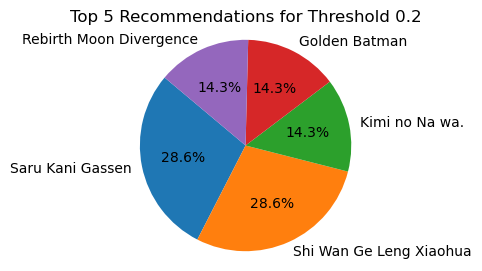


Recommendations for threshold 0.2:
Recommended anime similar to 'Death Note':
                                       Recommended Anime
0                                         Kimi no Na wa.
1                       Fullmetal Alchemist: Brotherhood
2                                               Gintama°
3                                            Steins;Gate
4                                          Gintama&#039;
...                                                  ...
11819       Toushindai My Lover: Minami tai Mecha-Minami
11820                                        Under World
11821                     Violence Gekiga David no Hoshi
11822  Violence Gekiga Shin David no Hoshi: Inma Dens...
11823                   Yasuji no Pornorama: Yacchimae!!

[11824 rows x 1 columns]

Number of recommendations: 11824

Value counts of recommended anime:
Recommended Anime
Saru Kani Gassen                                       2
Shi Wan Ge Leng Xiaohua                                2
Kimi no N

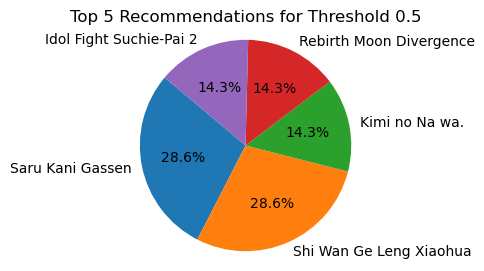


Recommendations for threshold 0.5:
Recommended anime similar to 'Death Note':
                                       Recommended Anime
0                                         Kimi no Na wa.
1                       Fullmetal Alchemist: Brotherhood
2                                               Gintama°
3                                            Steins;Gate
4                                          Gintama&#039;
...                                                  ...
11813       Toushindai My Lover: Minami tai Mecha-Minami
11814                                        Under World
11815                     Violence Gekiga David no Hoshi
11816  Violence Gekiga Shin David no Hoshi: Inma Dens...
11817                   Yasuji no Pornorama: Yacchimae!!

[11818 rows x 1 columns]

Number of recommendations: 11818

Value counts of recommended anime:
Recommended Anime
Saru Kani Gassen                    2
Shi Wan Ge Leng Xiaohua             2
Kimi no Na wa.                      1
Rebirth M

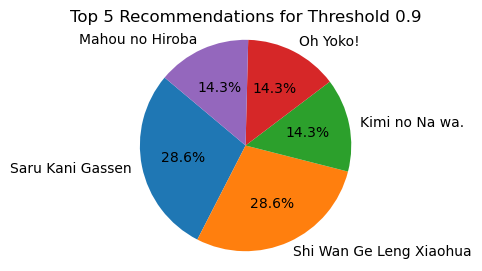


Recommendations for threshold 0.9:
Recommended anime similar to 'Death Note':
                                       Recommended Anime
0                                         Kimi no Na wa.
1                       Fullmetal Alchemist: Brotherhood
2                                               Gintama°
3                                            Steins;Gate
4                                          Gintama&#039;
...                                                  ...
11781       Toushindai My Lover: Minami tai Mecha-Minami
11782                                        Under World
11783                     Violence Gekiga David no Hoshi
11784  Violence Gekiga Shin David no Hoshi: Inma Dens...
11785                   Yasuji no Pornorama: Yacchimae!!

[11786 rows x 1 columns]

Number of recommendations: 11786

Value counts of recommended anime:
Recommended Anime
Saru Kani Gassen                    2
Shi Wan Ge Leng Xiaohua             2
Kimi no Na wa.                      1
Oh Yoko! 

In [78]:
import matplotlib.pyplot as plt

threshold_values = [0.2, 0.5, 0.9]
target_anime = 'Death Note'

for threshold in threshold_values:
    # Get recommendations for the current threshold
    recommended_anime = recommend_similar_anime(target_anime, threshold=threshold)

    # Create a DataFrame to display the recommended anime
    df_recommendations = pd.DataFrame(recommended_anime, columns=['Recommended Anime'])

    # Add additional information
    num_recommendations = len(recommended_anime)
    value_counts = df_recommendations['Recommended Anime'].value_counts()
    top_5_recommendations = value_counts.head(5)

    # Create pie chart of the top 5 recommendations using Matplotlib
    labels = top_5_recommendations.index
    sizes = top_5_recommendations.values

    plt.figure(figsize=(3, 3))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
    plt.title(f'Top 5 Recommendations for Threshold {threshold}')
    plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle.
    plt.show()

    # Display the information for the current threshold
    print(f"\nRecommendations for threshold {threshold}:")
    print("Recommended anime similar to '{}':".format(target_anime))
    print(df_recommendations)
    print("\nNumber of recommendations:", num_recommendations)
    print("\nValue counts of recommended anime:")
    print(value_counts)
    print("\nTop 5 recommendations:")
    print(top_5_recommendations)

### Given a target anime "Kimi no Na wa." and recommending a list of similar anime based on cosine similarity scores with different threshold values

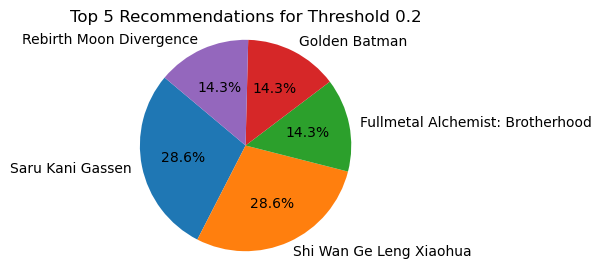


Recommendations for threshold 0.2:
Recommended anime similar to 'Kimi no Na wa.':
                                       Recommended Anime
0                       Fullmetal Alchemist: Brotherhood
1                                               Gintama°
2                                            Steins;Gate
3                                          Gintama&#039;
4      Haikyuu!!: Karasuno Koukou VS Shiratorizawa Ga...
...                                                  ...
11819       Toushindai My Lover: Minami tai Mecha-Minami
11820                                        Under World
11821                     Violence Gekiga David no Hoshi
11822  Violence Gekiga Shin David no Hoshi: Inma Dens...
11823                   Yasuji no Pornorama: Yacchimae!!

[11824 rows x 1 columns]

Number of recommendations: 11824

Value counts of recommended anime:
Recommended Anime
Saru Kani Gassen                                       2
Shi Wan Ge Leng Xiaohua                                2
Fullm

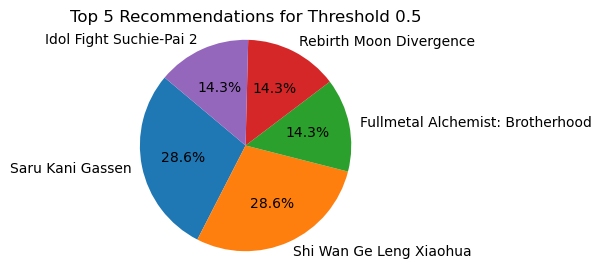


Recommendations for threshold 0.5:
Recommended anime similar to 'Kimi no Na wa.':
                                       Recommended Anime
0                       Fullmetal Alchemist: Brotherhood
1                                               Gintama°
2                                            Steins;Gate
3                                          Gintama&#039;
4      Haikyuu!!: Karasuno Koukou VS Shiratorizawa Ga...
...                                                  ...
11813       Toushindai My Lover: Minami tai Mecha-Minami
11814                                        Under World
11815                     Violence Gekiga David no Hoshi
11816  Violence Gekiga Shin David no Hoshi: Inma Dens...
11817                   Yasuji no Pornorama: Yacchimae!!

[11818 rows x 1 columns]

Number of recommendations: 11818

Value counts of recommended anime:
Recommended Anime
Saru Kani Gassen                    2
Shi Wan Ge Leng Xiaohua             2
Fullmetal Alchemist: Brotherhood    1
Rebir

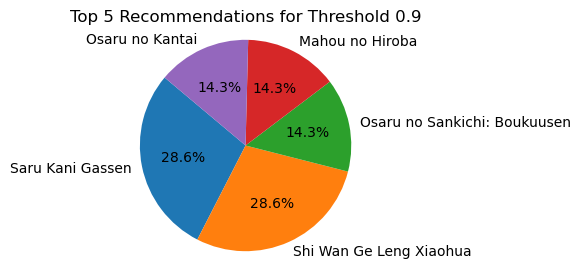


Recommendations for threshold 0.9:
Recommended anime similar to 'Kimi no Na wa.':
                                       Recommended Anime
0                       Fullmetal Alchemist: Brotherhood
1                                               Gintama°
2                                            Steins;Gate
3                                          Gintama&#039;
4      Haikyuu!!: Karasuno Koukou VS Shiratorizawa Ga...
...                                                  ...
11779       Toushindai My Lover: Minami tai Mecha-Minami
11780                                        Under World
11781                     Violence Gekiga David no Hoshi
11782  Violence Gekiga Shin David no Hoshi: Inma Dens...
11783                   Yasuji no Pornorama: Yacchimae!!

[11784 rows x 1 columns]

Number of recommendations: 11784

Value counts of recommended anime:
Recommended Anime
Saru Kani Gassen                          2
Shi Wan Ge Leng Xiaohua                   2
Osaru no Sankichi: Boukuusen   

In [77]:
threshold_values = [0.2, 0.5, 0.9]
target_anime = 'Kimi no Na wa.'

for threshold in threshold_values:
    # Get recommendations for the current threshold
    recommended_anime = recommend_similar_anime(target_anime, threshold=threshold)

    # Create a DataFrame to display the recommended anime
    df_recommendations = pd.DataFrame(recommended_anime, columns=['Recommended Anime'])

    # Add additional information
    num_recommendations = len(recommended_anime)
    value_counts = df_recommendations['Recommended Anime'].value_counts()
    top_5_recommendations = value_counts.head(5)

    # Create pie chart of the top 5 recommendations using Matplotlib
    labels = top_5_recommendations.index
    sizes = top_5_recommendations.values

    plt.figure(figsize=(3, 3))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
    plt.title(f'Top 5 Recommendations for Threshold {threshold}')
    plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle.
    plt.show()

    # Display the information for the current threshold
    print(f"\nRecommendations for threshold {threshold}:")
    print("Recommended anime similar to '{}':".format(target_anime))
    print(df_recommendations)
    print("\nNumber of recommendations:", num_recommendations)
    print("\nValue counts of recommended anime:")
    print(value_counts)
    print("\nTop 5 recommendations:")
    print(top_5_recommendations)

### Interpretation:

The insights provided by the recommendations generated for different threshold values:

Here, Lower thresholds → more recommendations (more lenient)

Higher thresholds → fewer recommendations (more strict)

**Threshold = 0.2:**

With a low threshold of 0.2, the recommendation system tends to include a larger number of anime as similar to the target anime.

The number of recommendations is likely to be higher compared to higher threshold values.

This may result in a more diverse set of recommendations, including anime with lower similarity scores.

**Threshold = 0.5:**

With a moderate threshold of 0.5, the recommendation system is more selective in choosing similar anime.

The number of recommendations is likely to be moderate, balancing between inclusivity and specificity.

The recommendations may include anime that share more significant similarities with the target anime.

**Threshold = 0.9:**

With a high threshold of 0.9, the recommendation system becomes highly selective in choosing similar anime.

The number of recommendations is likely to be lower compared to lower threshold values.

The recommendations may include only anime that are very closely related to the target anime, resulting in a more focused set of recommendations.

As said earlier, the choice of threshold value affects the number and nature of recommendations provided by the system. Lower thresholds lead to more inclusive recommendations, while higher thresholds result in more focused recommendations.

# Evaluation:

#### In a recommender system, the dataset is usually split into training and testing sets, and the system is evaluated by predicting whether a user will like or interact with a particular anime

In [79]:
pd.set_option('display.max_columns', None)
df_numerical.head()

,anime_id,name,type,episodes,rating,members,Action,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,Fantasy,Game,Harem,Hentai,Historical,Horror,Josei,Kids,Magic,Martial Arts,Mecha,Military,Music,Mystery,Parody,Police,Psychological,Romance,Samurai,School,Sci-Fi,Seinen,Shoujo,Shoujo Ai,Shounen,Shounen Ai,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Vampire,Yaoi,Yuri,liked
0,32281,Kimi no Na wa.,Movie,1.0,2.824474,3.292044,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
1,5114,Fullmetal Alchemist: Brotherhood,TV,64.0,2.717032,14.002410,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
2,28977,Gintama°,TV,51.0,2.707265,1.732216,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
3,9253,Steins;Gate,TV,24.0,2.629126,11.833499,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
4,9969,Gintama&#039;,TV,51.0,2.619358,2.400518,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1


In [80]:
df_numerical.describe()

,anime_id,episodes,rating,members,Action,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,Fantasy,Game,Harem,Hentai,Historical,Horror,Josei,Kids,Magic,Martial Arts,Mecha,Military,Music,Mystery,Parody,Police,Psychological,Romance,Samurai,School,Sci-Fi,Seinen,Shoujo,Shoujo Ai,Shounen,Shounen Ai,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Vampire,Yaoi,Yuri,liked
count,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000
mean,13404.150211,12.486729,0.006197,0.002928,0.232291,0.193829,0.006002,0.378952,0.020118,0.024260,0.166695,0.053001,0.187574,0.014370,0.026374,0.092899,0.066526,0.030431,0.004396,0.131023,0.062722,0.021809,0.078360,0.035080,0.070330,0.040744,0.033559,0.016399,0.019104,0.121386,0.012257,0.098394,0.171429,0.044801,0.049620,0.004565,0.140997,0.005241,0.099746,0.031784,0.044548,0.037616,0.083939,0.007270,0.008453,0.003128,0.003466,0.181403
std,11110.087616,47.097131,0.995442,1.000023,0.422311,0.395313,0.077241,0.485147,0.140411,0.153863,0.372719,0.224045,0.390388,0.119017,0.160251,0.290304,0.249209,0.171778,0.066156,0.337440,0.242472,0.146066,0.268749,0.183991,0.255713,0.197705,0.180098,0.127010,0.136896,0.326589,0.110035,0.297859,0.376899,0.206876,0.217167,0.067411,0.348034,0.072207,0.299674,0.175431,0.206317,0.190274,0.277308,0.084955,0.091555,0.055840,0.058771,0.385368
min,1.000000,1.000000,-4.696423,-0.331169,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3326.250000,1.000000,-0.572139,-0.327191,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9820.500000,2.000000,0.089602,-0.302679,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,23302.500000,12.000000,0.695181,-0.153817,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,34519.000000,1818.000000,3.439820,17.980218,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1

In [81]:
# Calculate mean and standard deviation for episodes, rating, and members
mean_episodes = 12.486729
mean_rating = 0.006197
mean_members = 0.002928

std_dev_episodes = np.std(df_numerical['episodes'])
std_dev_rating = np.std(df_numerical['rating'])
std_dev_members = np.std(df_numerical['members'])

# Set threshold values
episodes_threshold = mean_episodes + std_dev_episodes
rating_threshold = mean_rating + std_dev_rating
members_threshold = mean_members + std_dev_members

print("Threshold values:")
print("Episodes threshold:", episodes_threshold)
print("Rating threshold:", rating_threshold)
print("Members threshold:", members_threshold)

Threshold values:
Episodes threshold: 59.58186967572351
Rating threshold: 1.001596873109577
Members threshold: 1.0029082457034968


In [82]:
# Define threshold values for ratings, episodes, and members
rating_threshold = 1.001596873109577
episodes_threshold = 59.58186967572351
members_threshold = 1.0029082457034968

# Create binary target variable based on thresholds
df_numerical['liked'] = ((df_numerical['rating'] >= rating_threshold) |
                         (df_numerical['episodes'] >= episodes_threshold) |
                         (df_numerical['members'] >= members_threshold)).astype(int)

# Display the updated dataset with the new 'liked' column
df_numerical.head()

,anime_id,name,type,episodes,rating,members,Action,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,Fantasy,Game,Harem,Hentai,Historical,Horror,Josei,Kids,Magic,Martial Arts,Mecha,Military,Music,Mystery,Parody,Police,Psychological,Romance,Samurai,School,Sci-Fi,Seinen,Shoujo,Shoujo Ai,Shounen,Shounen Ai,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Vampire,Yaoi,Yuri,liked
0,32281,Kimi no Na wa.,Movie,1.0,2.824474,3.292044,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
1,5114,Fullmetal Alchemist: Brotherhood,TV,64.0,2.717032,14.002410,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
2,28977,Gintama°,TV,51.0,2.707265,1.732216,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
3,9253,Steins;Gate,TV,24.0,2.629126,11.833499,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
4,9969,Gintama&#039;,TV,51.0,2.619358,2.400518,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1


In [83]:
df_numerical['liked'].value_counts()

liked
0    9684
1    2146
Name: count, dtype: int64

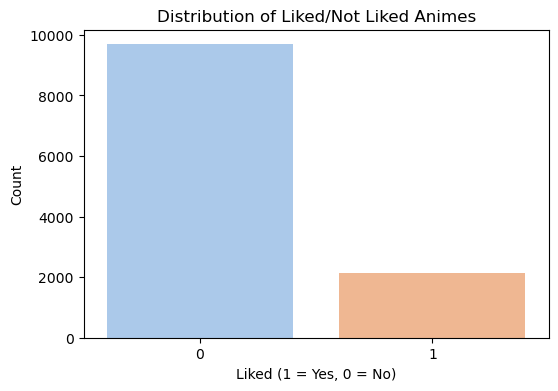

In [84]:
# Calculate value counts for the 'liked' column
liked_counts = df_numerical['liked'].value_counts()

# Plot bar plot using Seaborn
plt.figure(figsize=(6, 4))
sns.barplot(x=liked_counts.index, y=liked_counts.values, palette='pastel')

# Add titles and labels
plt.title('Distribution of Liked/Not Liked Animes')
plt.xlabel('Liked (1 = Yes, 0 = No)')
plt.ylabel('Count')

# Show plot
plt.show()

In [92]:
df_numerical['liked'].value_counts()

liked
0    9684
1    2146
Name: count, dtype: int64

### Split dataset into training and testing sets

In [100]:
from sklearn.model_selection import train_test_split

In [101]:
X = df_numerical.drop(['name', 'type','anime_id', 'liked'], axis=1)  # Features
y = df_numerical['liked']  # Target variable

In [102]:
X.columns

Index(['episodes', 'rating', 'members', 'Action', 'Adventure', 'Cars',
       'Comedy', 'Dementia', 'Demons', 'Drama', 'Ecchi', 'Fantasy', 'Game',
       'Harem', 'Hentai', 'Historical', 'Horror', 'Josei', 'Kids', 'Magic',
       'Martial Arts', 'Mecha', 'Military', 'Music', 'Mystery', 'Parody',
       'Police', 'Psychological', 'Romance', 'Samurai', 'School', 'Sci-Fi',
       'Seinen', 'Shoujo', 'Shoujo Ai', 'Shounen', 'Shounen Ai',
       'Slice of Life', 'Space', 'Sports', 'Super Power', 'Supernatural',
       'Thriller', 'Vampire', 'Yaoi', 'Yuri'],
      dtype='object')

In [103]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [104]:
# Display the shapes of the training and testing sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (9464, 46)
Shape of X_test: (2366, 46)
Shape of y_train: (9464,)
Shape of y_test: (2366,)


# Evaluation function

In [105]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [107]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [111]:
# Train a binary classification model (logistic regression) using the scaled training set
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [112]:
# Make predictions on the scaled testing set
y_pred = model.predict(X_test_scaled)

In [113]:
# Calculate precision, recall, and F1-score, accuracy
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.9459002535925612
Precision: 0.9007633587786259
Recall: 0.7990970654627539
F1-score: 0.84688995215311


### Interpretation:
Model performs very well overall.

High precision: It makes good-quality recommendations with few irrelevant suggestions.

Good recall: It captures most of the animes users would have liked.

Balanced F1: Good trade-off between catching liked animes and not recommending irrelevant ones.

## Interview Questions:

### 1. Can you explain the difference between user-based and item-based collaborative filtering
**User-Based Collaborative Filtering:**

Recommends items to a user based on the similarity between that user and other users.

Focuses on finding users with similar preferences.

Requires computing the similarity between users.

Suitable for scenarios with many users and interactions per user.

**Item-Based Collaborative Filtering:**

Recommends items to a user based on the similarity between items.

Focuses on finding similar items to those the user has interacted with.

Requires computing the similarity between items.

Suitable for scenarios with many items and fewer interactions per item.

Overall, user-based collaborative filtering focuses on similar users, while item-based collaborative filtering focuses on similar items. Each approach has its strengths and is suitable for different scenarios.

### 2. What is collaborative filtering, and how does it work?
Collaborative filtering is a technique used in recommender systems to generate personalized recommendations by analyzing user interactions with items.

It works by finding similarities between users or items based on their behavior, such as ratings or purchases, and then recommending items that similar users have liked or items similar to those the user has interacted with.

It does not require explicit knowledge about items or users and is widely used in applications like e-commerce and streaming services to improve user experience and engagement.